# WAM2layers test data

This notebook prepares a small set of test data for WAM2layers. It should be small enough to be shipped with the package. It can serve as reference data for 
- regression tests, i.e. verifying that the results are still the same after updating the code, 
- integration tests, i.e. verifying that the code as a whole runs as expected
- unit tests, i.e. checking that individual functions are doing what we expect
- quick examples to verify correct installation

In [1]:
import xarray as xr
from cartopy import crs, feature as cf

In [2]:
# Make a cutout of the Netherlands and vicinity
for variable in ["e", "sp", "tp", "ml_q", "ml_u", "ml_v"]:
    
    infile = f'/home/peter/wam2layers/era5_global/2021/07/ERA5_2021-07-15_{variable}.nc'
    outfile = f"../sample_data/input_data/ERA5_2021-07-15_{variable}.nc"
    
    print("Cropping", infile, 'as', outfile)

    ds = xr.open_dataset(infile)
    cutout = ds.sel(latitude=slice(55, 45), longitude=slice(0, 10))
    cutout.to_netcdf(outfile)

Cropping /home/peter/wam2layers/era5_global/2021/07/ERA5_2021-07-15_e.nc as ../sample_data/input_data/ERA5_2021-07-15_e.nc
Cropping /home/peter/wam2layers/era5_global/2021/07/ERA5_2021-07-15_sp.nc as ../sample_data/input_data/ERA5_2021-07-15_sp.nc
Cropping /home/peter/wam2layers/era5_global/2021/07/ERA5_2021-07-15_tp.nc as ../sample_data/input_data/ERA5_2021-07-15_tp.nc
Cropping /home/peter/wam2layers/era5_global/2021/07/ERA5_2021-07-15_ml_q.nc as ../sample_data/input_data/ERA5_2021-07-15_ml_q.nc
Cropping /home/peter/wam2layers/era5_global/2021/07/ERA5_2021-07-15_ml_u.nc as ../sample_data/input_data/ERA5_2021-07-15_ml_u.nc
Cropping /home/peter/wam2layers/era5_global/2021/07/ERA5_2021-07-15_ml_v.nc as ../sample_data/input_data/ERA5_2021-07-15_ml_v.nc


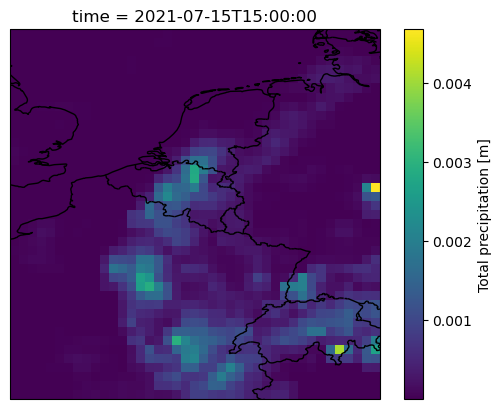

In [3]:
# Inspect the cutout
tp = xr.open_dataset('../sample_data/input_data/ERA5_2021-07-15_tp.nc').isel(time=15).tp.squeeze()
p = tp.plot(subplot_kws={"projection": crs.PlateCarree()})
p.axes.coastlines()
p.axes.add_feature(cf.BORDERS)


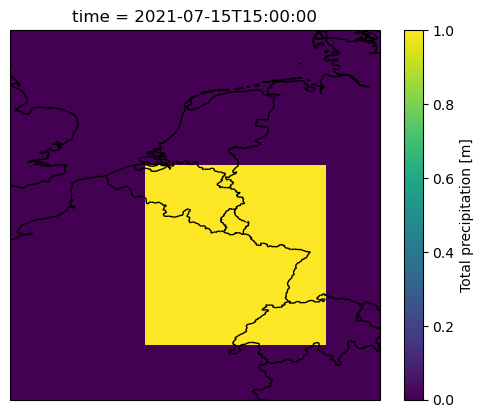

In [4]:
# Make a source region map
source_region = xr.zeros_like(tp).rename('source_region')
source_region[15:35, 15:35] = 1

# Inspect
p = source_region.plot(subplot_kws={"projection": crs.PlateCarree()})
p.axes.coastlines()
p.axes.add_feature(cf.BORDERS)

# Save
source_region.to_netcdf("../sample_data/source_region.nc")

In [5]:
# Save corresponding config file
from textwrap import dedent

with open("../sample_data/sample_config.yaml", "w") as f:
    f.writelines(dedent("""\
        # Paths (relative to root of repo)
        filename_template: sample_data/input_data/ERA5_{year}-{month:02d}-{day:02d}{levtype}_{variable}.nc
        region: sample_data/source_region.nc
        preprocessed_data_folder: /tmp/wam2layers/sample/preprocessed_data
        output_folder: /tmp/wam2layers/sample/output_data

        # Dates
        preprocess_start_date: "2021-07-15T01:00"
        preprocess_end_date: "2021-07-15T23:00"
        track_start_date: "2021-07-15T01:00"
        track_end_date: "2021-07-15T23:00"
        event_start_date: "2021-07-15T10:00"
        event_end_date: "2021-07-15T23:00"

        # Time
        input_frequency: "1h"
        target_frequency: "10min"
        output_frequency: "3h"

        # Levels
        level_type: model_levels
        levels: [20,40,60,80,90,95,100,105,110,115,120,123,125,128,130,131,132,133,134,135,136,137]

        # Model settings
        log_level: info
        restart: False
        periodic_boundary: false
        kvf: 3
        chunks: null
    """)
)

In [9]:
# Add README to sample_data folder

with open("../sample_data/README.txt", "w") as f:
    f.writelines(dedent("""\
        This configuration can be used for testing wam2layers.
        
        From the root of the repo, run 
        
        $ wam2layers backtrack era5 sample_data/sample_config.yaml 
        $ wam2layers backtrack sample_data/sample_config.yaml
        
        Output will be stored in temp dir (works on linux).
         
        Reference output is stored in this same folder, this can be used to
        verify that the data hasn't changed.
        
        This data is used in tests/test_cli.py
    """)
)
